In [22]:
import seaborn as sns
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [23]:
df_train= pd.read_csv(r"C:/Users/Thinkpad/dataset/Weekly-train.csv")
df_test= pd.read_csv(r"C:/Users/Thinkpad/dataset/Weekly-test.csv")

print(df_test.head(5))

   V1         V2         V3        V4         V5         V6         V7  \
0  W1  35397.160  35808.590  35808.59  36246.140  36246.140  36403.700   
1  W2   3608.061   3624.368   3537.64   3587.344   3662.088   3658.634   
2  W3   9602.400   9895.900   9915.90   9726.600   9626.500   9966.100   
3  W4   2336.560   2373.140   2457.51   2586.000   2237.700   2877.940   
4  W5   1499.000   1734.000   1391.00   1833.000   1637.000   2122.000   

          V8        V9        V10        V11        V12        V13        V14  
0  36403.700  36150.20  36150.200  35790.550  35790.550  34066.950  34066.950  
1   3622.148   3591.48   3638.559   3635.781   3522.328   3458.631   3354.758  
2  10008.500   9911.70   9760.700   9968.200  10089.100  10005.900   9823.300  
3   2497.740   3525.34   3053.330   3151.070   3425.790   3505.610   4098.690  
4   1757.000   2079.00   2477.000   1957.000   1907.000   1752.000   1330.000  


In [3]:
print(df_train.head(5))

   V1        V2        V3       V4        V5       V6        V7        V8  \
0  W1  1089.200  1078.910  1079.88  1063.580  1060.61  1056.930  1056.630   
1  W2   195.928   194.796   192.71   190.288   188.77   187.043   187.353   
2  W3   258.700   259.800   260.20   260.800   261.10   263.100   264.500   
3  W4  3460.000  3340.000  2770.00  2520.000  2740.00  2760.000  2470.000   
4  W5  4696.000  4765.000  4144.00  3945.000  4733.00  4330.000  5046.000   

         V9       V10  ...    V2589    V2590    V2591    V2592    V2593  \
0  1049.510  1049.320  ...      NaN      NaN      NaN      NaN      NaN   
1   186.808   186.721  ...      NaN      NaN      NaN      NaN      NaN   
2   266.300   267.200  ...      NaN      NaN      NaN      NaN      NaN   
3  2480.000  3260.000  ...  2315.35  2195.23  2170.14  2156.88  2177.15   
4  3898.000  4568.000  ...      NaN      NaN      NaN      NaN      NaN   

     V2594    V2595    V2596    V2597    V2598  
0      NaN      NaN      NaN      NaN

In [4]:
print(df_train.shape)
print(df_test.shape)

(359, 2598)
(359, 14)


In [5]:
df_train = df_train.dropna(axis=1)
df_train 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81
0,W1,1089.200,1078.910,1079.88,1063.580,1060.61,1056.930,1056.630,1049.510,1049.320,...,1127.980,1139.460,1134.090,1138.070,1135.72,1148.230,1144.120,1150.090,1154.58,1153.860
1,W2,195.928,194.796,192.71,190.288,188.77,187.043,187.353,186.808,186.721,...,207.678,205.744,207.377,207.375,209.69,211.707,210.619,209.255,211.92,213.226
2,W3,258.700,259.800,260.20,260.800,261.10,263.100,264.500,266.300,267.200,...,325.400,326.500,327.100,327.200,327.60,327.500,327.000,327.100,328.00,329.300
3,W4,3460.000,3340.000,2770.00,2520.000,2740.00,2760.000,2470.000,2480.000,3260.000,...,1640.000,1560.000,1480.000,1390.000,1490.00,1540.000,1520.000,1730.000,2660.00,2420.000
4,W5,4696.000,4765.000,4144.00,3945.000,4733.00,4330.000,5046.000,3898.000,4568.000,...,3553.000,3219.000,4493.000,3977.000,6044.00,5138.000,3567.000,3763.000,4939.00,2975.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,W355,4798.000,5192.000,4194.00,4217.000,3926.00,3987.000,3541.000,4068.000,3953.000,...,2033.000,2075.000,2119.000,2135.000,2126.00,2251.000,2382.000,2539.000,2584.00,2678.000
355,W356,4923.000,6382.000,4387.00,4979.000,4660.00,4437.000,4125.000,4781.000,4702.000,...,3718.000,3802.000,3467.000,3299.000,3866.00,3333.000,3817.000,3546.000,3986.00,4563.000
356,W357,4401.000,4955.000,3680.00,4214.000,4139.00,3384.000,3712.000,4077.000,4204.000,...,3194.000,3061.000,2852.000,2907.000,3283.00,3138.000,3268.000,3110.000,3343.00,3766.000
357,W358,5977.000,7770.000,5843.00,6169.000,5990.00,5537.000,5299.000,6064.000,5832.000,...,4755.000,4879.000,4502.000,4365.000,5085.00,4559.000,4890.000,4057.000,5042.00,6503.000


In [6]:
df_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,W1,35397.160,35808.590,35808.59,36246.140,36246.140,36403.700,36403.700,36150.20,36150.200,35790.550,35790.550,34066.950,34066.950
1,W2,3608.061,3624.368,3537.64,3587.344,3662.088,3658.634,3622.148,3591.48,3638.559,3635.781,3522.328,3458.631,3354.758
2,W3,9602.400,9895.900,9915.90,9726.600,9626.500,9966.100,10008.500,9911.70,9760.700,9968.200,10089.100,10005.900,9823.300
3,W4,2336.560,2373.140,2457.51,2586.000,2237.700,2877.940,2497.740,3525.34,3053.330,3151.070,3425.790,3505.610,4098.690
4,W5,1499.000,1734.000,1391.00,1833.000,1637.000,2122.000,1757.000,2079.00,2477.000,1957.000,1907.000,1752.000,1330.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,W355,2777.000,2893.000,2760.00,2745.000,2807.000,2862.000,2880.000,2838.00,2908.000,2838.000,2698.000,3357.000,2928.000
355,W356,4387.000,3772.000,3660.00,3878.000,3131.000,2405.000,4081.000,4811.00,4170.000,4017.000,3824.000,4661.000,4297.000
356,W357,3938.000,3363.000,3249.00,3515.000,3097.000,2275.000,3421.000,4166.00,3807.000,3434.000,3303.000,4024.000,3747.000
357,W358,6907.000,5711.000,5496.00,5862.000,5380.000,3660.000,5159.000,6787.00,5596.000,5445.000,5345.000,6156.000,5866.000


In [7]:
df_test = df_test.drop(columns= 'V1')

In [24]:
def prophet_for_some_column(data, column_name):
    df = data[[column_name]].reset_index()
    df.columns = ['ds', 'y']

    df['ds'] = pd.date_range(start='2023-01-01', periods=len(df), freq='W')

    model = Prophet()
    model.fit(df)

    future = model.make_future_dataframe(periods=12, freq="W", include_history=False)

    forecast = model.predict(future)

    forecast["variable"] = column_name
    forecast['index'] = range(1, len(forecast) + 1)

    model.plot_components(forecast)

    return forecast#[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'variable']]


21:01:19 - cmdstanpy - INFO - Chain [1] start processing
21:01:19 - cmdstanpy - INFO - Chain [1] done processing


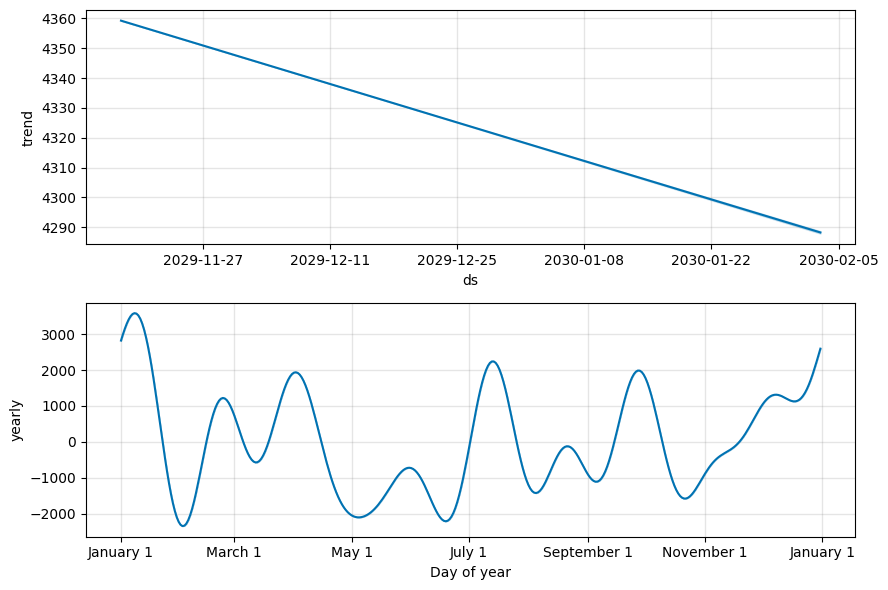

In [26]:
forecast_v2 = prophet_for_some_column(df_test, "V2")

21:02:49 - cmdstanpy - INFO - Chain [1] start processing
21:02:49 - cmdstanpy - INFO - Chain [1] done processing


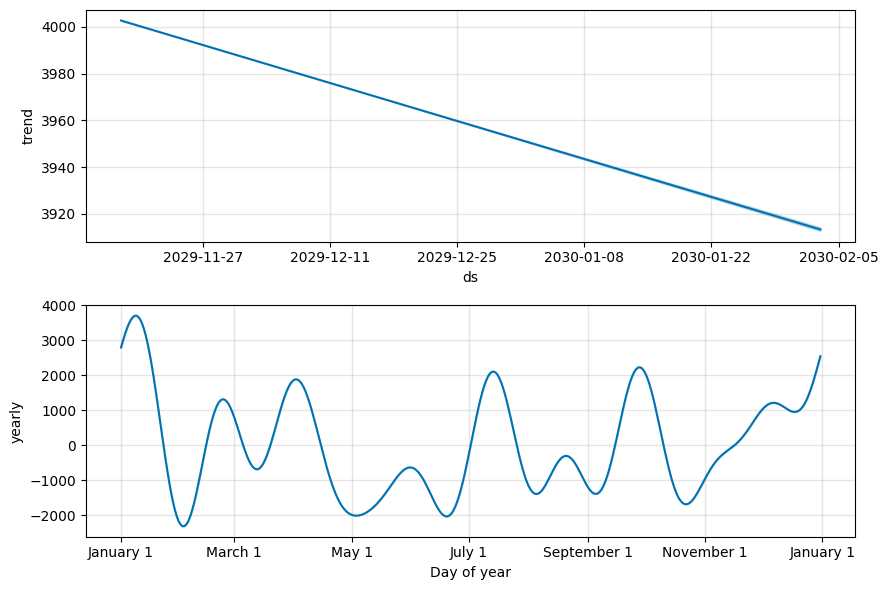

In [27]:
forecast_v3 = prophet_for_some_column(df_test, "V3")

21:03:30 - cmdstanpy - INFO - Chain [1] start processing
21:03:30 - cmdstanpy - INFO - Chain [1] done processing


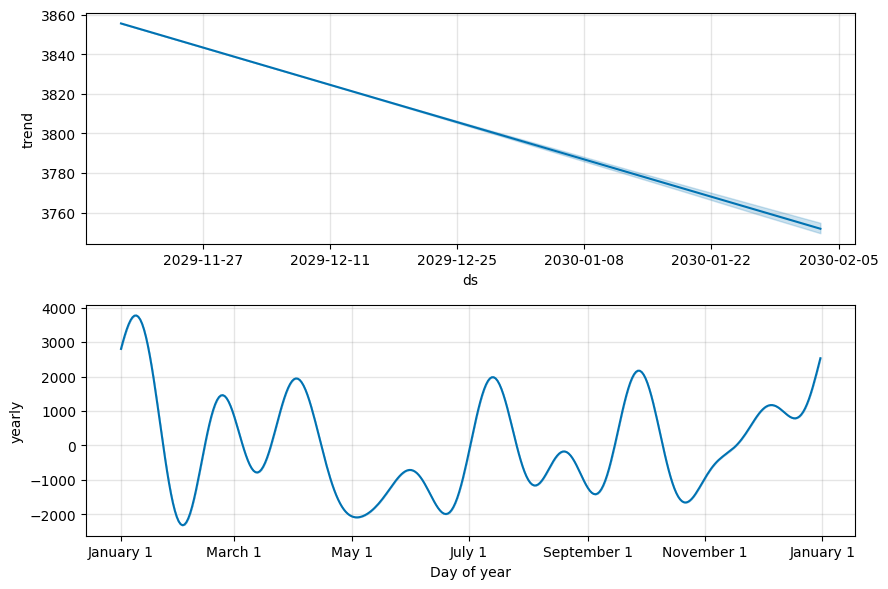

In [29]:
forecast_v4 = prophet_for_some_column(df_test, "V4")

In [32]:
forecast_all = pd.concat([forecast_v2, forecast_v3, forecast_v4])
forecast_all

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,variable,index
0,2029-11-18,4359.220087,-1977.498901,11073.000713,4359.220087,4359.220087,-47.885242,-47.885242,-47.885242,-47.885242,-47.885242,-47.885242,0.0,0.0,0.0,4311.334845,V2,1
1,2029-11-25,4352.767753,-1372.680707,11673.161081,4352.767753,4352.767753,505.044359,505.044359,505.044359,505.044359,505.044359,505.044359,0.0,0.0,0.0,4857.812113,V2,2
2,2029-12-02,4346.315419,-552.402930,11973.508826,4346.315419,4346.318616,1122.400435,1122.400435,1122.400435,1122.400435,1122.400435,1122.400435,0.0,0.0,0.0,5468.715854,V2,3
3,2029-12-09,4339.863085,-946.706990,11745.368115,4339.847891,4339.896350,1308.556322,1308.556322,1308.556322,1308.556322,1308.556322,1308.556322,0.0,0.0,0.0,5648.419407,V2,4
4,2029-12-16,4333.410751,-1451.351137,11774.579119,4333.374399,4333.479849,1140.378408,1140.378408,1140.378408,1140.378408,1140.378408,1140.378408,0.0,0.0,0.0,5473.789160,V2,5
5,2029-12-23,4326.958417,-661.689859,12861.484477,4326.884686,4327.065744,1370.018623,1370.018623,1370.018623,1370.018623,1370.018623,1370.018623,0.0,0.0,0.0,5696.977040,V2,6
6,2029-12-30,4320.506083,295.376706,13395.213136,4320.388519,4320.651277,2414.064120,2414.064120,2414.064120,2414.064120,2414.064120,2414.064120,0.0,0.0,0.0,6734.570204,V2,7
7,2030-01-06,4314.053749,1560.729822,14169.638404,4313.896767,4314.250824,3483.036957,3483.036957,3483.036957,3483.036957,3483.036957,3483.036957,0.0,0.0,0.0,7797.090707,V2,8
8,2030-01-13,4307.601415,1405.914213,14237.441817,4307.403785,4307.849640,3176.811962,3176.811962,3176.811962,3176.811962,3176.811962,3176.811962,0.0,0.0,0.0,7484.413377,V2,9
9,2030-01-20,4301.149081,-1077.915687,11617.638218,4300.894588,4301.458450,1101.794156,1101.794156,1101.794156,1101.794156,1101.794156,1101.794156,0.0,0.0,0.0,5402.943238,V2,10


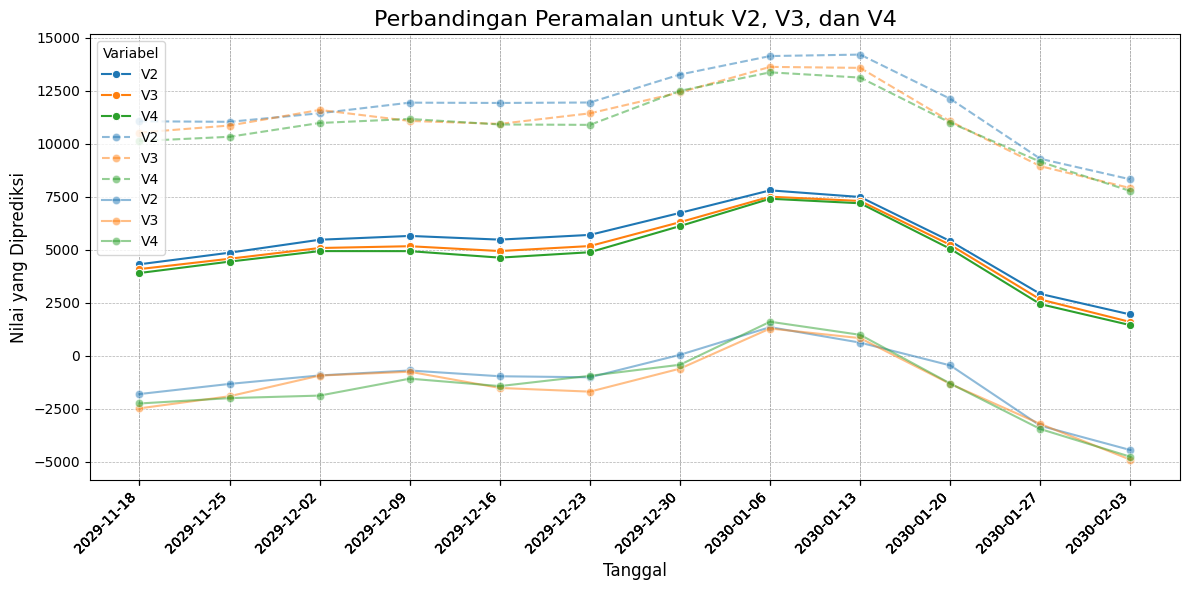

yhat: Prediksi nilai yang diperkirakan
yhat_lower: Batas bawah prediksi
yhat_upper: Batas atas prediksi



In [10]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=forecast_all, x="ds", y="yhat", hue="variable", marker="o", linestyle="-", markersize= 6)

sns.lineplot(data=forecast_all, x='ds', y='yhat_upper', hue='variable', marker="o", linestyle='--', color='gray', alpha=0.5)
sns.lineplot(data=forecast_all, x='ds', y='yhat_lower', hue='variable', marker="o", linestyle='-', color='gray', alpha=0.5)

plt.title('Perbandingan Peramalan untuk V2, V3, dan V4', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai yang Diprediksi', fontsize=12)
plt.legend(title='Variabel', loc='upper left', fontsize=10)
plt.xticks(forecast_all["ds"], rotation=45, ha="right", fontsize=10)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()

print('yhat: Prediksi nilai yang diperkirakan\n'
                        'yhat_lower: Batas bawah prediksi\n'
                        'yhat_upper: Batas atas prediksi\n')

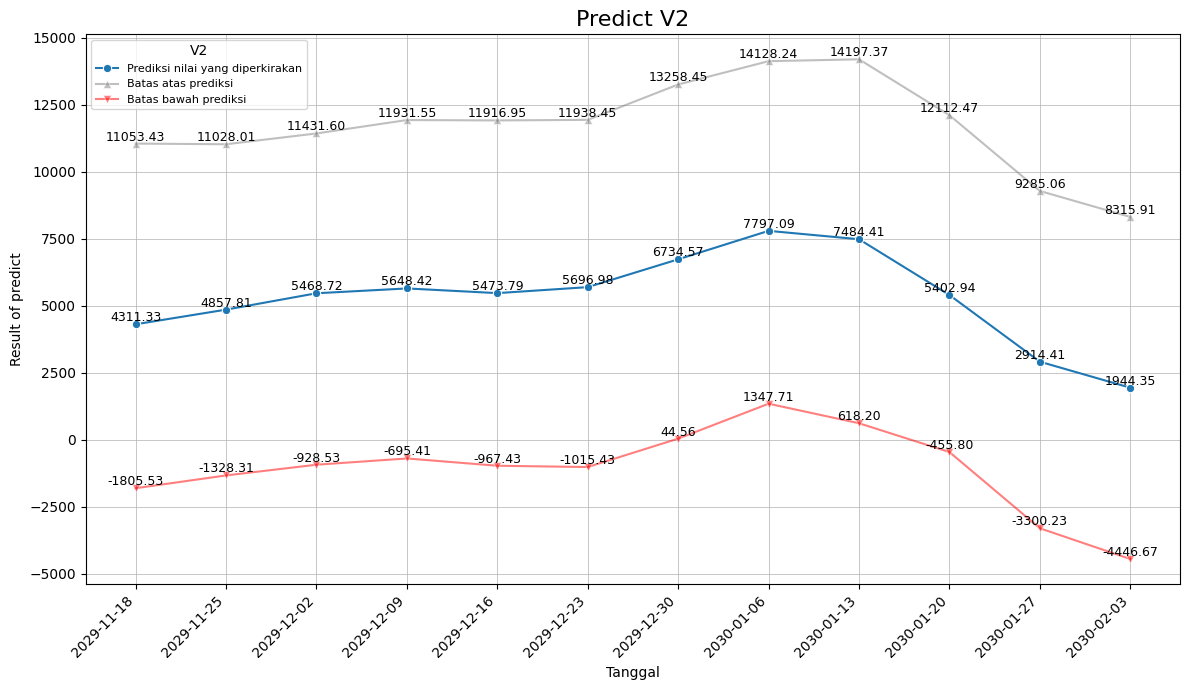

In [11]:
plt.figure(figsize=(12,7))

sns.lineplot(data=forecast_v2, x='ds', y='yhat', marker='o',linestyle='-', markersize=6, label='Prediksi nilai yang diperkirakan')
sns.lineplot(data=forecast_v2, x='ds', y='yhat_upper',marker="^", linestyle='-', color="grey", alpha=0.5, label="Batas atas prediksi")
sns.lineplot(data=forecast_v2, x='ds', y='yhat_lower',marker="v", linestyle='-', color="red", alpha=0.5, label="Batas bawah prediksi")

plt.title("Predict V2", fontsize = 16)
plt.xlabel("Tanggal", fontsize=10)
plt.ylabel("Result of predict", fontsize=10)
plt.legend(title="V2", loc="upper left", fontsize=8)
plt.xticks(forecast_v2["ds"], rotation=45, ha="right", fontsize=10)
plt.grid(True, which="both", linestyle="-", linewidth=0.5)
for i in range(len(forecast_v2)):
     plt.text(forecast_v2['ds'].iloc[i], forecast_v2['yhat'].iloc[i], f"{forecast_v2['yhat'].iloc[i]:.2f}",
                 fontsize=9, ha='center', va='bottom')
     plt.text(forecast_v2['ds'].iloc[i], forecast_v2['yhat_lower'].iloc[i], f"{forecast_v2['yhat_lower'].iloc[i]:.2f}",
                 fontsize=9, ha='center', va='bottom')
     plt.text(forecast_v2['ds'].iloc[i], forecast_v2['yhat_upper'].iloc[i], f"{forecast_v2['yhat_upper'].iloc[i]:.2f}",
                 fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.show()

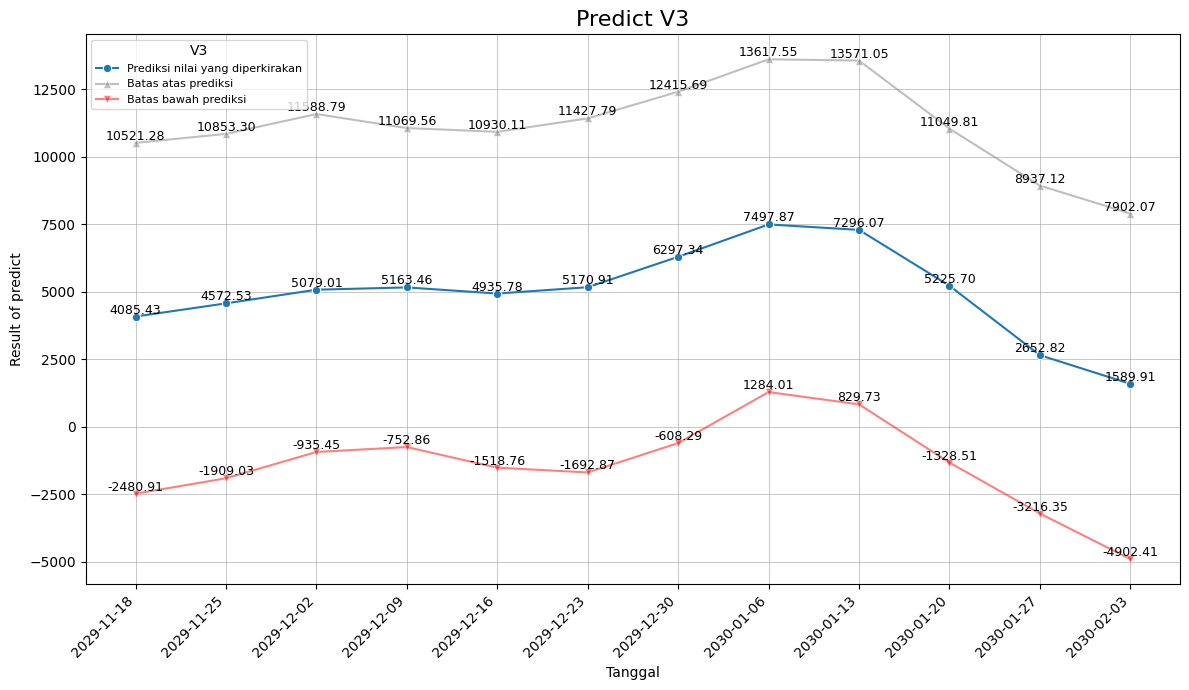

In [12]:
plt.figure(figsize=(12,7))

sns.lineplot(data=forecast_v3, x='ds', y='yhat', marker='o',linestyle='-', markersize=6, label='Prediksi nilai yang diperkirakan')
sns.lineplot(data=forecast_v3, x='ds', y='yhat_upper',marker="^", linestyle='-', color="grey", alpha=0.5, label="Batas atas prediksi")
sns.lineplot(data=forecast_v3, x='ds', y='yhat_lower',marker="v", linestyle='-', color="red", alpha=0.5, label="Batas bawah prediksi")

plt.title("Predict V3", fontsize = 16)
plt.xlabel("Tanggal", fontsize=10)
plt.ylabel("Result of predict", fontsize=10)
plt.legend(title="V3", loc="upper left", fontsize=8)
plt.xticks(forecast_v2["ds"], rotation=45, ha="right", fontsize=10)
plt.grid(True, which="both", linestyle="-", linewidth=0.5)
for i in range(len(forecast_v3)):
    plt.text(forecast_v3['ds'].iloc[i], forecast_v3['yhat'].iloc[i], f"{forecast_v3['yhat'].iloc[i]:.2f}",
                 fontsize=9, ha='center', va='bottom')
    plt.text(forecast_v3['ds'].iloc[i], forecast_v3['yhat_lower'].iloc[i], f"{forecast_v3['yhat_lower'].iloc[i]:.2f}",
                 fontsize=9, ha='center', va='bottom')
    plt.text(forecast_v3['ds'].iloc[i], forecast_v3['yhat_upper'].iloc[i], f"{forecast_v3['yhat_upper'].iloc[i]:.2f}",
                 fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.show()

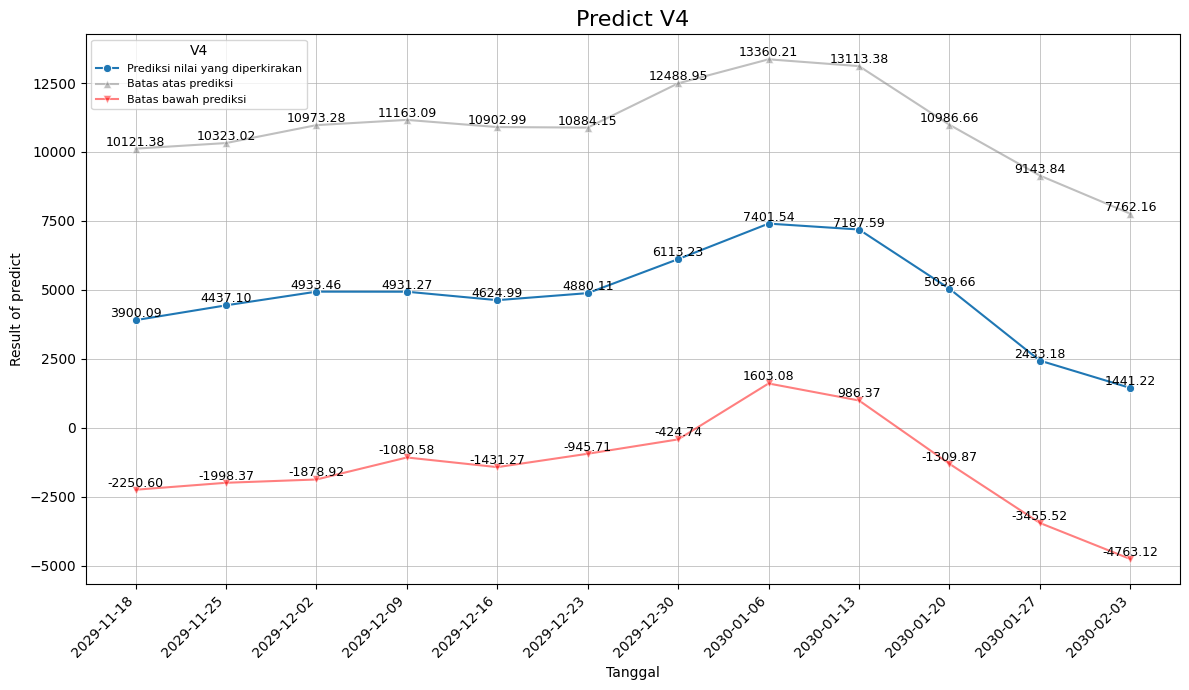

In [13]:
plt.figure(figsize=(12,7))

sns.lineplot(data=forecast_v4, x='ds', y='yhat', marker='o',linestyle='-', markersize=6, label='Prediksi nilai yang diperkirakan')
sns.lineplot(data=forecast_v4, x='ds', y='yhat_upper',marker="^", linestyle='-', color="grey", alpha=0.5, label="Batas atas prediksi")
sns.lineplot(data=forecast_v4, x='ds', y='yhat_lower',marker="v", linestyle='-', color="red", alpha=0.5, label="Batas bawah prediksi")

plt.title("Predict V4", fontsize = 16)
plt.xlabel("Tanggal", fontsize=10)
plt.ylabel("Result of predict", fontsize=10)
plt.legend(title="V4", loc="upper left", fontsize=8)
plt.xticks(forecast_v4["ds"], rotation=45, ha="right", fontsize=10)
plt.grid(True, which="both", linestyle="-", linewidth=0.5)
for i in range(len(forecast_v4)):
    plt.text(forecast_v4['ds'].iloc[i], forecast_v4['yhat'].iloc[i], f"{forecast_v4['yhat'].iloc[i]:.2f}",
                 fontsize=9, ha='center', va='bottom')
    plt.text(forecast_v4['ds'].iloc[i], forecast_v4['yhat_lower'].iloc[i], f"{forecast_v4['yhat_lower'].iloc[i]:.2f}",
                 fontsize=9, ha='center', va='bottom')
    plt.text(forecast_v4['ds'].iloc[i], forecast_v4['yhat_upper'].iloc[i], f"{forecast_v4['yhat_upper'].iloc[i]:.2f}",
                 fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.show()